In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.model_selection import train_test_split
from scipy import stats

In [8]:

missing = [' ']
eurusdH4 = pd.read_csv("EuroGBP_H1.csv", na_values = missing)
eurusdH4.dropna(inplace = True) 
print(eurusdH4.shape)
mean = eurusdH4['Mean']
low = eurusdH4['Low']
high = eurusdH4['High']

(19666, 20)


In [14]:
X = eurusdH4.values[:,3:16]

In [17]:
# X[1][0]

In [18]:
# lowX_train, lowX_test, lowy_train, lowy_test = train_test_split(
#     X, low, test_size=0.1, random_state=0)

In [19]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, low)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
lowY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((low-lowY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((low-Y_bar)**2)
MSE = (sum((low - lowY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )


RSS : 81384819.96735826
MSE : 4141.299611609926
   Coefficient Names  Coefficient   Std. Error  t-statistic  P-value
0          Intercept  -83002.1907       15.755    -5268.191    0.000
1               Open    5278.0027     2691.936        1.961    0.050
2                 Ma    7382.8873  1127434.840        0.007    0.995
3                Rsi      -0.4302        0.127       -3.388    0.001
4                CCI      -0.1239        0.008      -15.988    0.000
5                adx       0.0168        0.050        0.335    0.737
6               Macd   29561.7175      909.633       32.499    0.000
7                atr  -49727.3396      965.293      -51.515    0.000
8            Chaiken      -0.0000        0.000       -1.793    0.073
9            HighLow      -0.0001        0.000       -1.972    0.049
10          Aligator    7382.8830  1127432.946        0.007    0.995
11                AC   17739.6959      633.842       27.988    0.000
12                AD      -0.0000        0.000       -1

In [20]:
lowData = []
lowData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
lowData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
lowData['Actual Low'] = low
lowData['Predicted Low'] = lowY_hat
lowData.to_csv('low data prediction.csv',index=False)

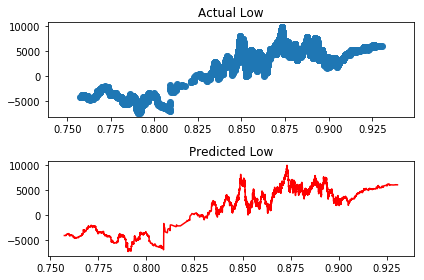

In [21]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,low)
ax1.set_title('Actual Low')
ax2.plot(np.sort(XX) ,lowY_hat ,color='red');
ax2.set_title('Predicted Low')

plt.tight_layout()
# plt.show()

In [22]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, high)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
highY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((high-highY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((high - Y_bar)**2)
MSE = (sum((high - highY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 99514698.58112037
MSE : 5063.845846790167
   Coefficient Names  Coefficient   Std. Error  t-statistic  P-value
0          Intercept  -82945.8182       17.422    -4760.973    0.000
1               Open    3669.1942     2976.872        1.233    0.218
2                 Ma   -2831.6583  1242515.353       -0.002    0.998
3                Rsi       1.0494        0.140        7.474    0.000
4                CCI      -0.2583        0.009      -30.138    0.000
5                adx       0.0140        0.055        0.253    0.800
6               Macd   -8018.1169     1005.868       -7.971    0.000
7                atr   10901.0550     1067.396       10.213    0.000
8            Chaiken      -0.0000        0.000      -11.812    0.000
9            HighLow       0.0002        0.000        5.512    0.000
10          Aligator   -2831.6573  1242517.379       -0.002    0.998
11                AC   -1887.6182      700.888       -2.693    0.007
12                AD      -0.0000        0.000       -4

In [23]:
highData = []
highData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
highData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
highData['Actual High'] = high
highData['Predicted High'] = highY_hat
highData.to_csv('High data prediction.csv',index=False)

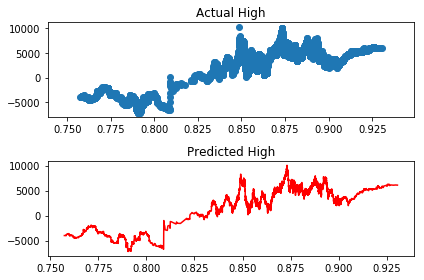

In [24]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,high)
ax1.set_title('Actual High')
ax2.plot(np.sort(XX) ,highY_hat ,color='red');
ax2.set_title('Predicted High')

plt.tight_layout()
plt.show()

In [25]:
# meanX_train, meanX_test, meany_train, meany_test = train_test_split(
#     X, mean, test_size=0.1, random_state=0)

In [26]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, mean)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
meanY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.00001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((mean-meanY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((mean-Y_bar)**2)
MSE = (sum((mean - meanY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 40582780.14473076
MSE : 2065.071246933175
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -82974.0044      11.125    -7458.072    0.000
1               Open    4473.5984    1900.508        2.354    0.019
2                 Ma    2275.6145   79533.996        0.029    0.977
3                Rsi       0.3096       0.090        3.453    0.001
4                CCI      -0.1911       0.005      -34.915    0.000
5                adx       0.0154       0.035        0.436    0.663
6               Macd   10771.8003     642.323       16.770    0.000
7                atr  -19413.1423     681.699      -28.478    0.000
8            Chaiken      -0.0000       0.000      -10.517    0.000
9            HighLow       0.0001       0.000        2.919    0.004
10          Aligator    2275.6129   79536.004        0.029    0.977
11                AC    7926.0388     447.605       17.708    0.000
12                AD      -0.0000       0.000       -4.622    0.000


In [27]:
meanData = []
meanData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
meanData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
meanData['Actual Mean'] = mean
meanData['Predicted Mean'] = meanY_hat
meanData.to_csv('Mean data prediction.csv',index=False)

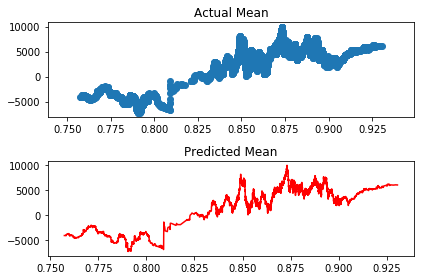

In [28]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,mean)
ax1.set_title('Actual Mean')
ax2.plot(np.sort(XX) ,meanY_hat ,color='red');
ax2.set_title('Predicted Mean')

plt.tight_layout()
plt.show()

In [29]:

print(len(meanY_hat), len(low))

gg = np.sum(meanY_hat >= low)
print(gg)

19666 19666
18913


In [30]:
gg1 = np.sum(meanY_hat <= high)
print(gg1)


18672


In [31]:
gg1 = np.sum(highY_hat <= low)
print(gg1)

2


In [32]:
gg1 = np.sum(lowY_hat >= high)
print(gg1)

3


In [33]:
highg = np.sum(highY_hat >=high)
print(highg)

12477


In [34]:
lowg = np.sum(lowY_hat < low)
print(lowg)

12092


In [35]:
print(meanY_hat)

[-4047.05977261 -4051.41729361 -4047.1631733  ...  6080.10041712
  6089.09465229  6064.38525825]


In [36]:
666-18


648

In [37]:
18294/19666

0.9302349232177362

In [93]:
19666-1372

18294